<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/f2_ml_and_time_series/ml_with_python/Aula_4_Avaliando_o_Melhor_Modelo_de_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
imoveis = pd.read_csv('https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2005/Base%20de%20Dados/Valorizacao_Ambiental.csv', sep=';')

- Area = Tamanho da área do imóvel
- IA = idade do imóvel
- Andar = Quantidade de andares
- Suites = Quantidade de suites
- Vista = se o imóvel tem uma boa vista ou não
- DisBM = distancia do imóvel do mar
- SemRuido = se o imóvel esta em uma area calma ou não
- AV100m = Distancia proxima à area verde

In [3]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [4]:
imoveis.shape

(172, 10)

In [5]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [6]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Text(0.5, 1.0, 'Histograma da variável valor')

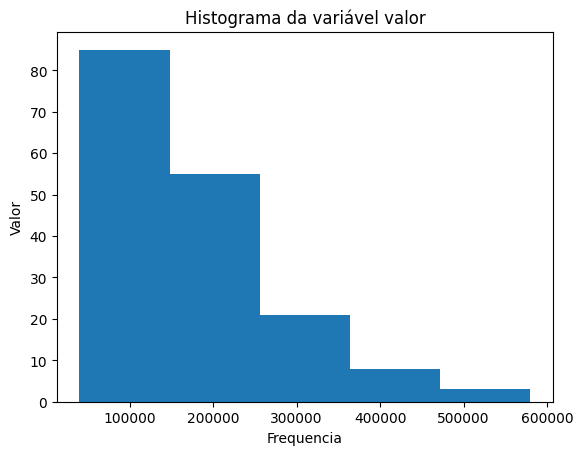

In [7]:

plt.hist(imoveis["Valor"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [8]:
imoveis["raiz_valor"] = np.sqrt(imoveis['Valor'])

In [9]:
imoveis["raiz_valor"]

0      400.000000
1      258.843582
2      435.889894
3      331.662479
4      264.575131
          ...    
167    282.842712
168    379.473319
169    419.523539
170    447.164399
171    379.473319
Name: raiz_valor, Length: 172, dtype: float64

Text(0.5, 1.0, 'Histograma da variável valor')

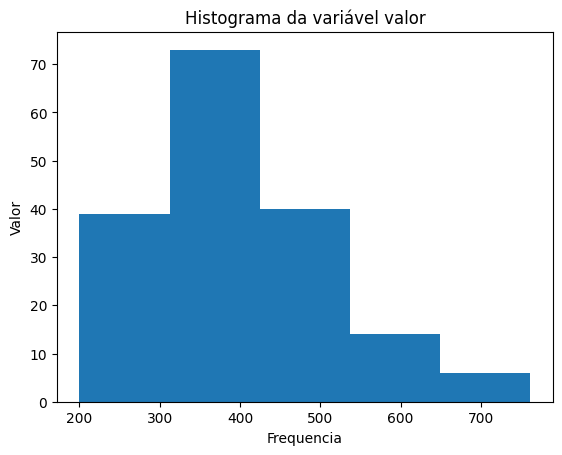

In [10]:
plt.hist(imoveis["raiz_valor"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

Text(0, 0.5, 'Qtd de suites')

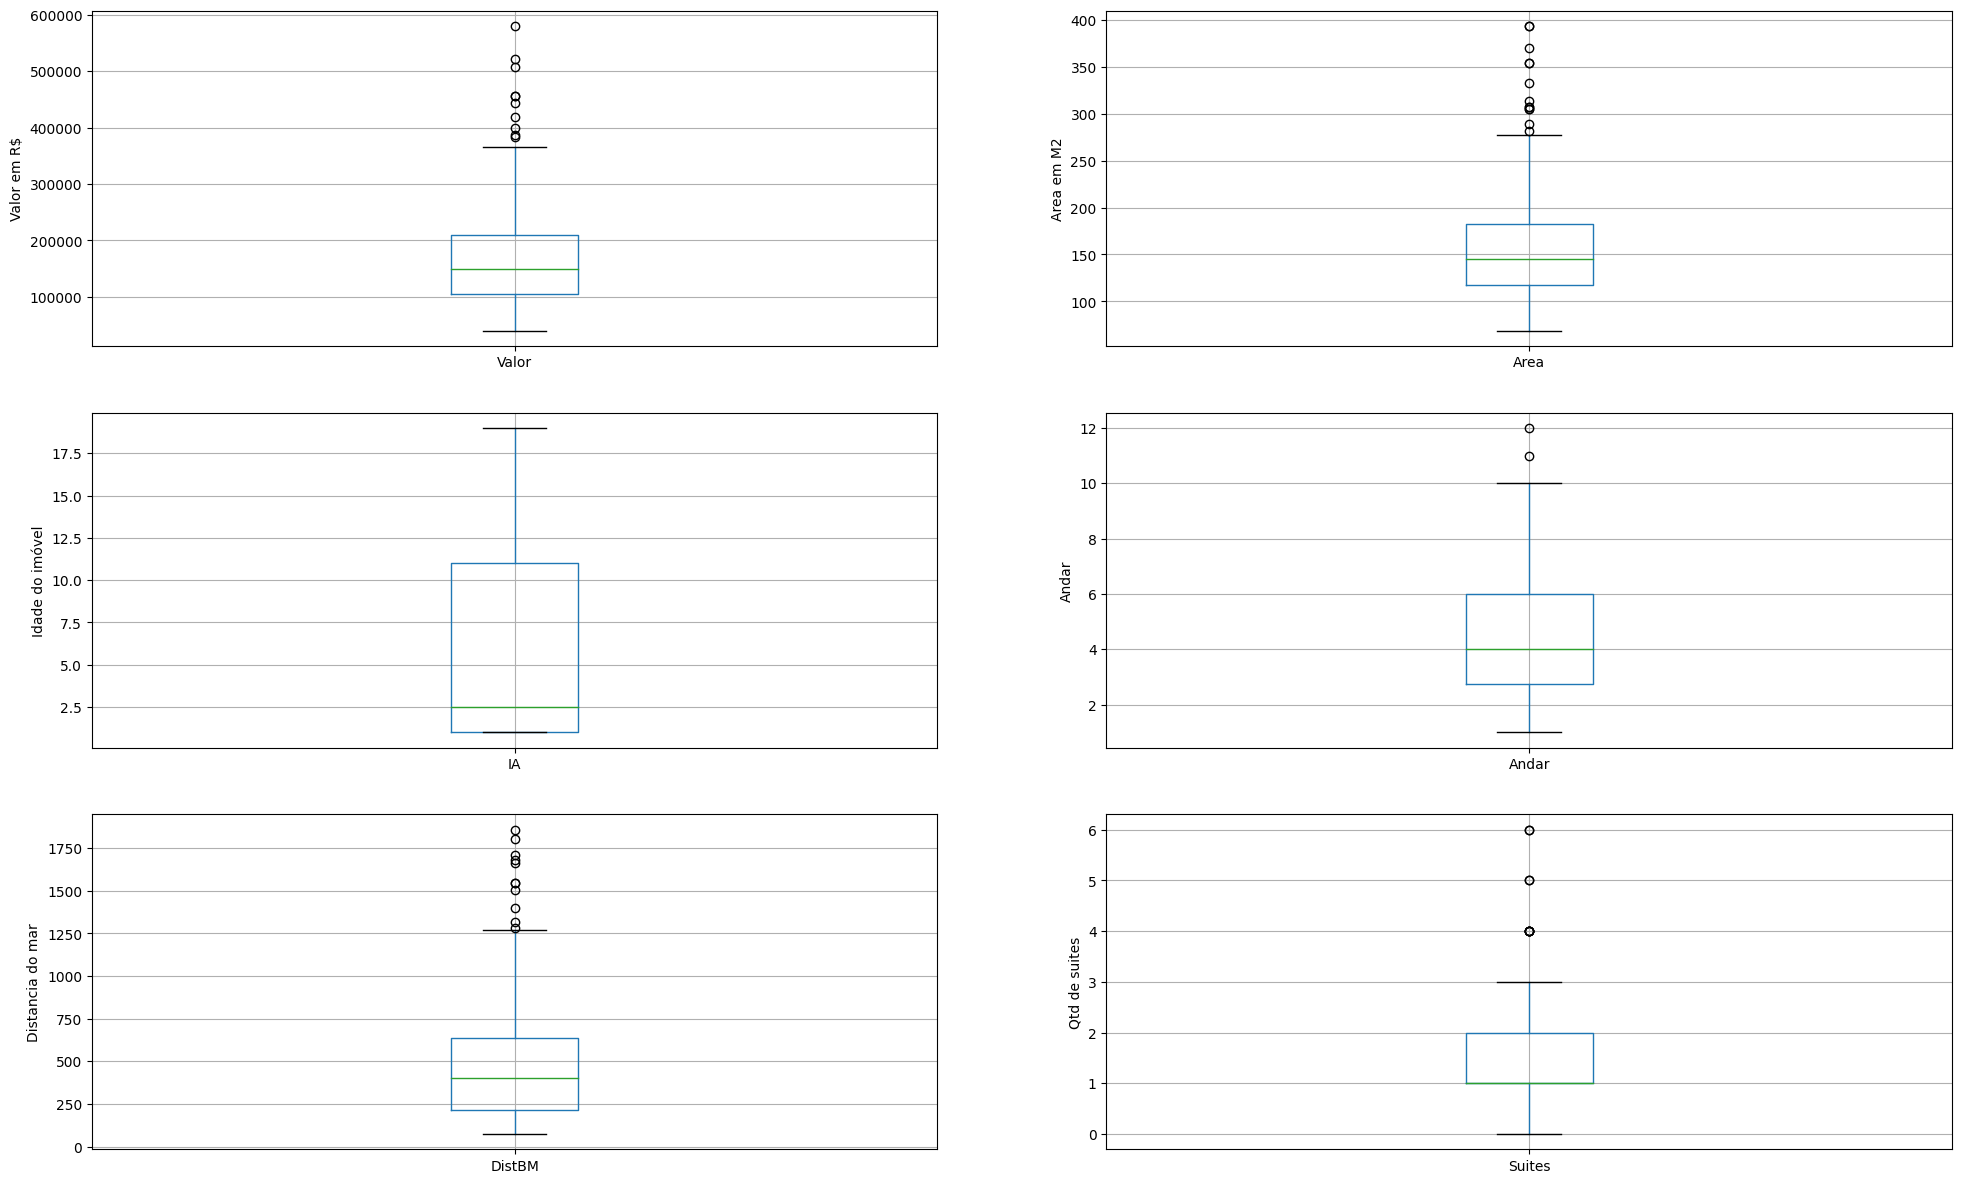

In [13]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = imoveis.boxplot(column = "Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4,2,2)
fig = imoveis.boxplot(column = "Area")
fig.set_title("")
fig.set_ylabel("Area em M2")

plt.subplot(4,2,3)
fig = imoveis.boxplot(column = "IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4,2,4)
fig = imoveis.boxplot(column = "Andar")
fig.set_title("")
fig.set_ylabel("Andar")


plt.subplot(4,2,5)
fig = imoveis.boxplot(column = "DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")

plt.subplot(4,2,6)
fig = imoveis.boxplot(column = "Suites")
fig.set_title("")
fig.set_ylabel("Qtd de suites")




<Axes: >

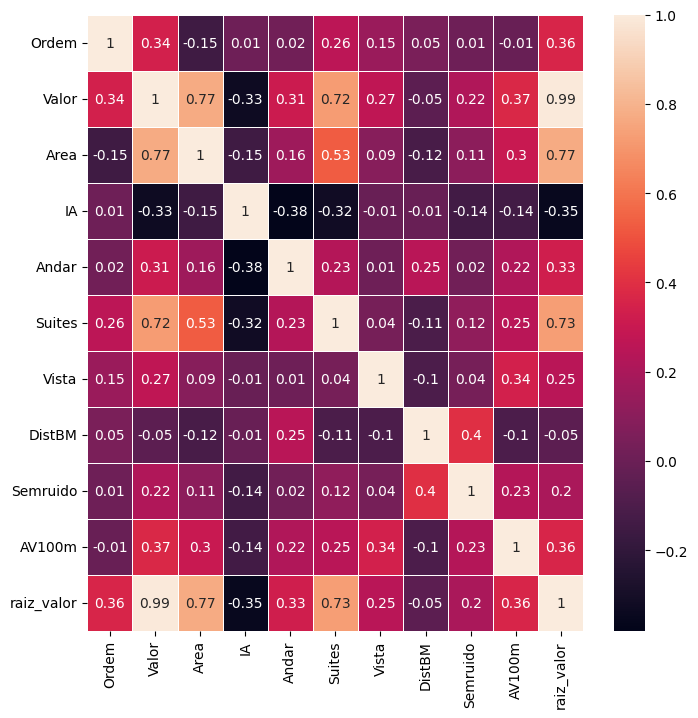

In [18]:
correlation_matrix = imoveis.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))

sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
